In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [31]:
cols_to_drop = ["profit_margin", "budget"]
train_df = pd.read_csv("train.csv")
val_df = pd.read_csv("validation.csv")
# val_df = pd.read_csv("test.csv")
X_train = train_df.drop(columns=cols_to_drop)
X_val = val_df.drop(columns=cols_to_drop)
y_train = train_df["profit_margin"]
y_val = val_df["profit_margin"]

In [40]:
grid_space = {"max_depth":[3, 5, 10, None],
              "n_estimators":[10, 100, 200],
              "max_features":["sqrt", "log2", None],
              "min_samples_leaf":[1, 2, 4],
              "min_samples_split":[2, 5, 8]
              }
random_forest = RandomForestRegressor()
grid = GridSearchCV(random_forest, param_grid=grid_space, cv=3)
model_grid = grid.fit(X_train, y_train)

In [ ]:
for max_depth in [3, 5, 10, None]:
    for n_estimators in [10, 100, 200]:
        for max_features in ["sqrt", "log2", None]:
            for min_samples_leaf in [1, 2, 4]:
                for min_samples_split in [2, 5, 8]:
                    random_forest = RandomForestRegressor(max_depth=max_depth, )

In [41]:
y_pred = model_grid.predict(X_val)

In [42]:
rmse = np.sqrt(mean_squared_error(y_pred, y_val))
rmse 

0.668980640702459

In [43]:
mae = mean_absolute_error(y_pred, y_val)
mae

0.5457130952545353

<Axes: >

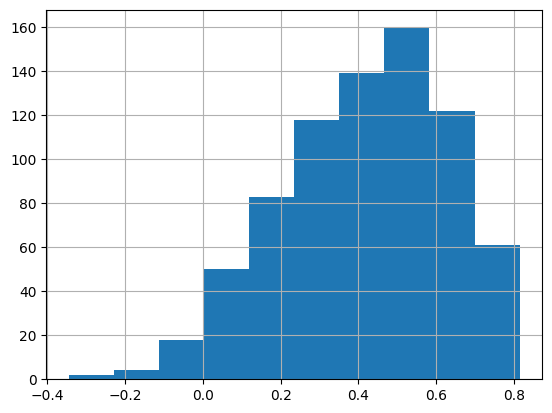

In [44]:
pd.Series(np.log(y_pred)).hist()

<Axes: >

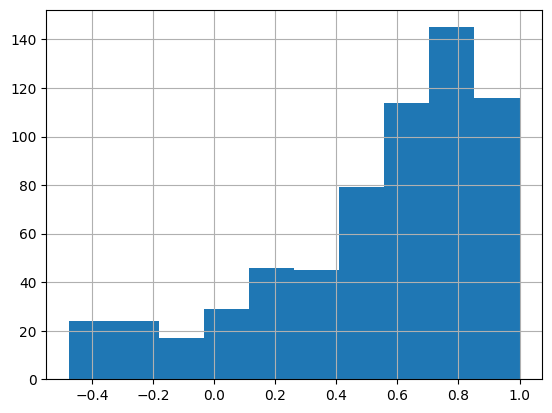

In [45]:
pd.Series(np.log(y_val[np.log(y_val) > -0.5])).hist()

(array([557., 110.,  27.,  17.,  16.,  11.,   7.,   5.,   3.,   4.]),
 array([4.25061782e-04, 5.45838991e-01, 1.09125292e+00, 1.63666685e+00,
        2.18208078e+00, 2.72749471e+00, 3.27290864e+00, 3.81832257e+00,
        4.36373650e+00, 4.90915043e+00, 5.45456436e+00]),
 <BarContainer object of 10 artists>)

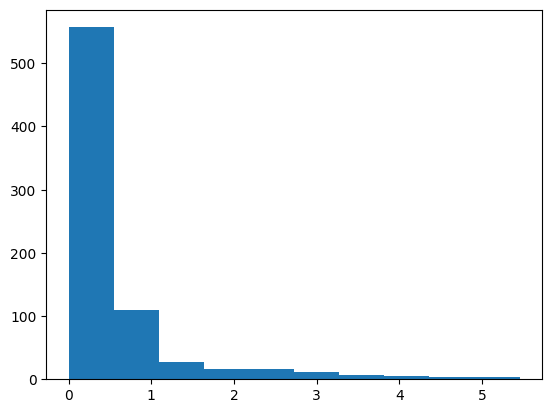

In [46]:
# pd.Series(y_val).hist()
plt.hist(np.abs(np.log(y_val) - np.log(y_pred)))

In [47]:
results = grid.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean MSE: {mean_score:.4f} - Hyperparameters: {params}")

Mean MSE: 0.0849 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Mean MSE: 0.1070 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean MSE: 0.1098 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean MSE: 0.1093 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Mean MSE: 0.1108 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean MSE: 0.1099 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean MSE: 0.1012 - Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estim

(array([[  1.,   1.,   9.,  32.,  69., 121., 184., 165.,  57.,   0.],
        [ 24.,  24.,  17.,  29.,  46.,  45.,  79., 114., 145., 116.]]),
 array([-0.47592791, -0.32833883, -0.18074976, -0.03316069,  0.11442838,
         0.26201745,  0.40960652,  0.55719559,  0.70478466,  0.85237373,
         0.9999628 ]),
 <a list of 2 BarContainer objects>)

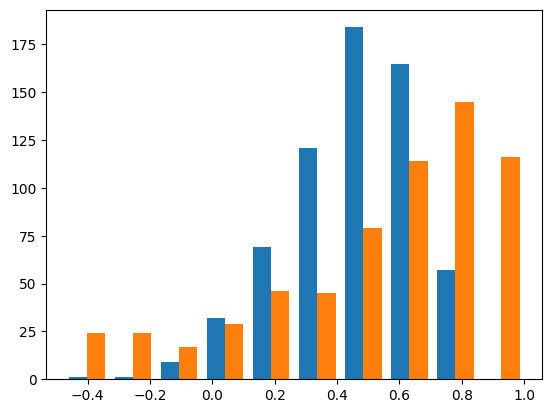

In [53]:
out_df = pd.DataFrame({"prediction": np.log(y_pred), "validation": np.log(y_val)})
out_df = out_df[out_df["validation"] > -.5]
plt.hist(out_df)